# Advertising Dataset - Logistic Regression Project

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Dataset Overview](#section2)<br/>
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
4. [Exploratory Data Analysis](#section4)</br>
5. [Questions](#section5)
    - 5.1 [What is the age distribution of customers using the advertising service?](#section501)<br/>
    - 5.2 [How does the age of consumers correlate to the Area Income?](#section502)<br/>
    - 5.3 [How does the age of the customer correlate to the time they spend on the App daily?](#section503)<br/>
    - 5.4 [How is the Area Income of a user correlated to the daily usage of internet?](#section504)<br/>

6. [Overview of pair-wise relationships with respect to output variable](#section6)<br/>
7. [Training and Testing Data](#section7)<br/>
    - 7.1 [Training the model](#section701)<br/>
    - 7.2 [Predicting off Test Data](#section702)<br/>
    - 7.3 [Evaluating the Model](#section703)<br/>
8. [Conclusion](#section8)<br/>

<a id='section1'></a>
## 1. Problem Statement:

The following dataset is representative of an advertising company that would like to know which of their customers have clicked on an advertisement. We know various information about the customers such as their age, the time they spend on the internet daily and the average income in their area.

The company is trying to understand the demographic of customers that would click these ads. They are also interested in being able to predict with some accuracy, whether a customer will click on the advertisement or not based on their features.

<a id='section2'></a>
## 2. Dataset Overview:

- This dataset consists of customer information. Using this data, we will attempt to answer the problem statement while exploring underlying patterns in the data. We will implement a logistic regression model to then predict whether a customer will click on the advertisement or not.

- The dataset is quite small in size and comprises of only __1000 observations of 10 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| Daily Time Spent on Site           |Time the user has spent on the site                                                  | 
| Age      | Age of the customer                        |  
| Area Income        | Avg. Income of geographical area of consumer                                           | 
| Daily Internet Usage          | Avg. minutes a day consumer is on the internet sessions.                                        |   
| Ad Topic Line           | Headline of the advertisement                                          |
| City           | City of the consumer                                       |
| Male         | Indicates whether the customer is male or not (1 - Male;0 - Female)  |
| Country         | Country of the consumer  |
| Timestamp         | Time at which consumer clicked on Ad or closed window  |
| Clicked on Ad         | 0 or 1 indicated clicking on Ad  |

#### Imports

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

#### Importing the dataset

In [36]:
ad_data = pd.read_csv('advertising.csv')

<a id='section3'></a>
## 3. Data Profiling:

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Once we identify if there are any inconsistencies and shortcomings of the data, we will begin preprocessing it.
- In __preprocessing__ we will deal with erronous and missing values of columns. If necessary, we may also add columns to make analysis easier.

<a id='section301'></a>
### 3.1 Understanding the Dataset

In [37]:
ad_data.shape

(1000, 10)

In [38]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [39]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [40]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [41]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [42]:
ad_data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

From the above table we can see that the data does not contain any null values nor missing values. Due to this, we can continue on to explore the data and find its underlying patterns without having to fill in missing values.

## Exploratory Data Analysis

Now let's try and use seaborn to explore and visualize the data!

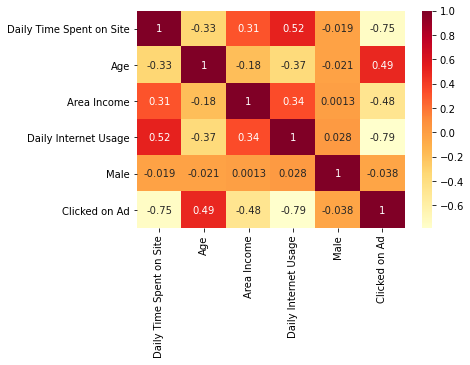

In [43]:
sns.heatmap(ad_data.corr(),annot=True,cmap='YlOrRd')

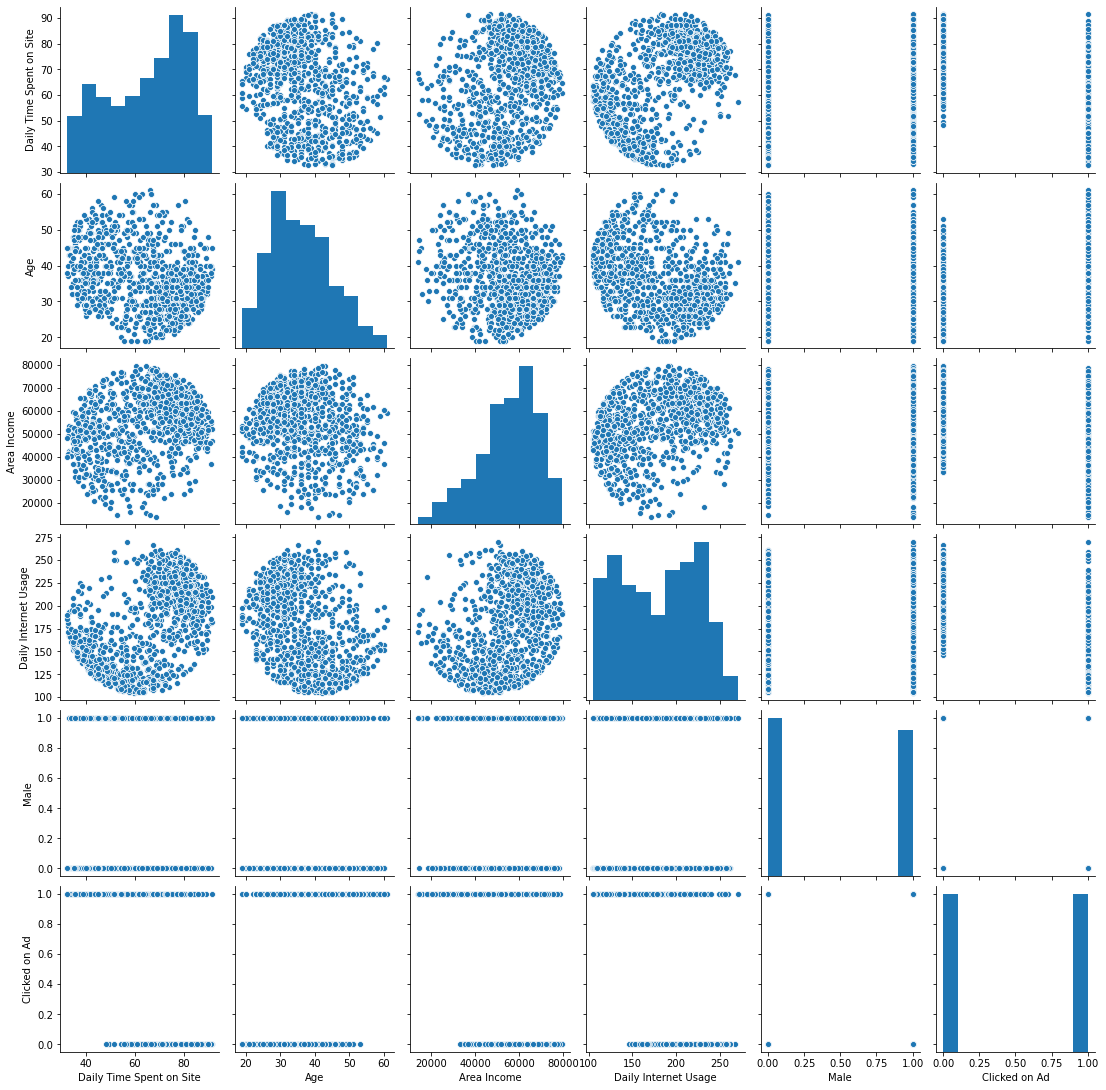

In [44]:
sns.pairplot(data=ad_data)

- We have used a basic pair plot to get an overview of how our different features influence eachother. 
- To find out how our columns are correlated, we also use a heatmap. 
- Now that we are aware of the relationships between columns and the degree to which they are correlated, we can begin to explore them in more depth.

<a id='section5'></a>
## 5. Questions:

<a id='section501'></a>
### 5.1 What is the age distribution of customers using the advertising service?

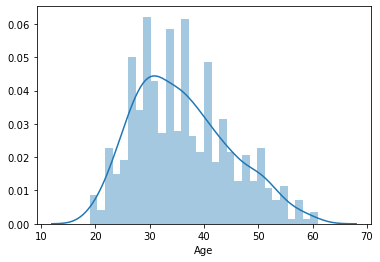

In [45]:
sns.distplot(ad_data['Age'],bins=30)

The above graph shows the distribution of age across users. We can see that the average age of consumers is around 30 years old.

<a id='section502'></a>
### 5.2 How does the age of consumers correlate to the Area Income?

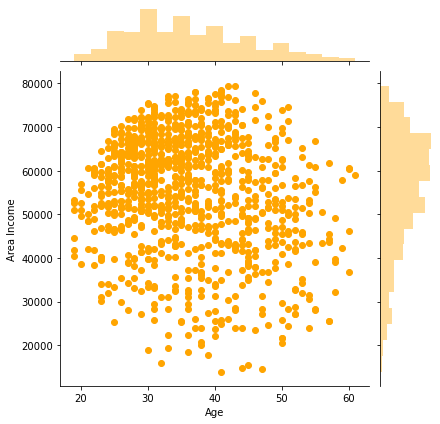

In [46]:
sns.jointplot(x='Age',y='Area Income',data=ad_data,color='orange')

Our data indicates that there is a large concentration of points between 25 and 35 which fall into a high area income. This indicates that younger customers live in an area of higher income.

<a id='section503'></a>
### 5.3 How does the age of the customer correlate to the time they spend on the App daily?

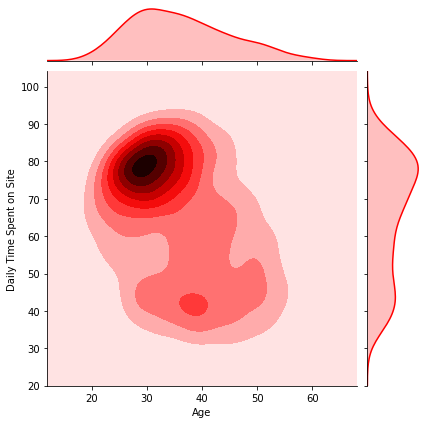

In [47]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,kind='kde',color='red')

Younger customers (Aged between 25 and 35) seem to spend more time on the App when compared to the older ones. This is shown above in the jointplot.

<a id='section504'></a>
### 5.4 How is the Area Income of a user correlated to the daily usage of internet?

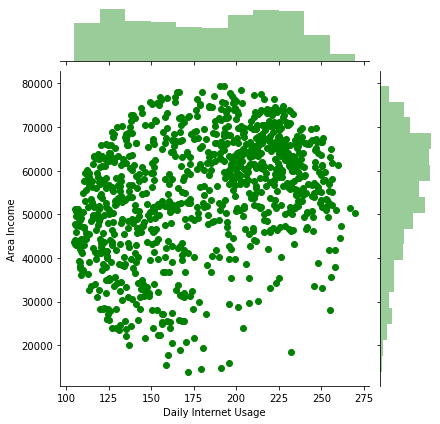

In [48]:
sns.jointplot(x='Daily Internet Usage',y='Area Income',data=ad_data,color='green')

Plotting a graph of __Area Income__ to __Daily Internet Usage__ , we can see that the data is relatively well distributed but we see a slightly higher concentration of points of in the upper-left quadrant of our graph. There seems to be a trend of high internet usage correlating to higher area income. This makes sense as higher areas of income are more likely to have access to internet.

<a id='section6'></a>
## 6. Overview of pair-wise relationships with respect to output variable

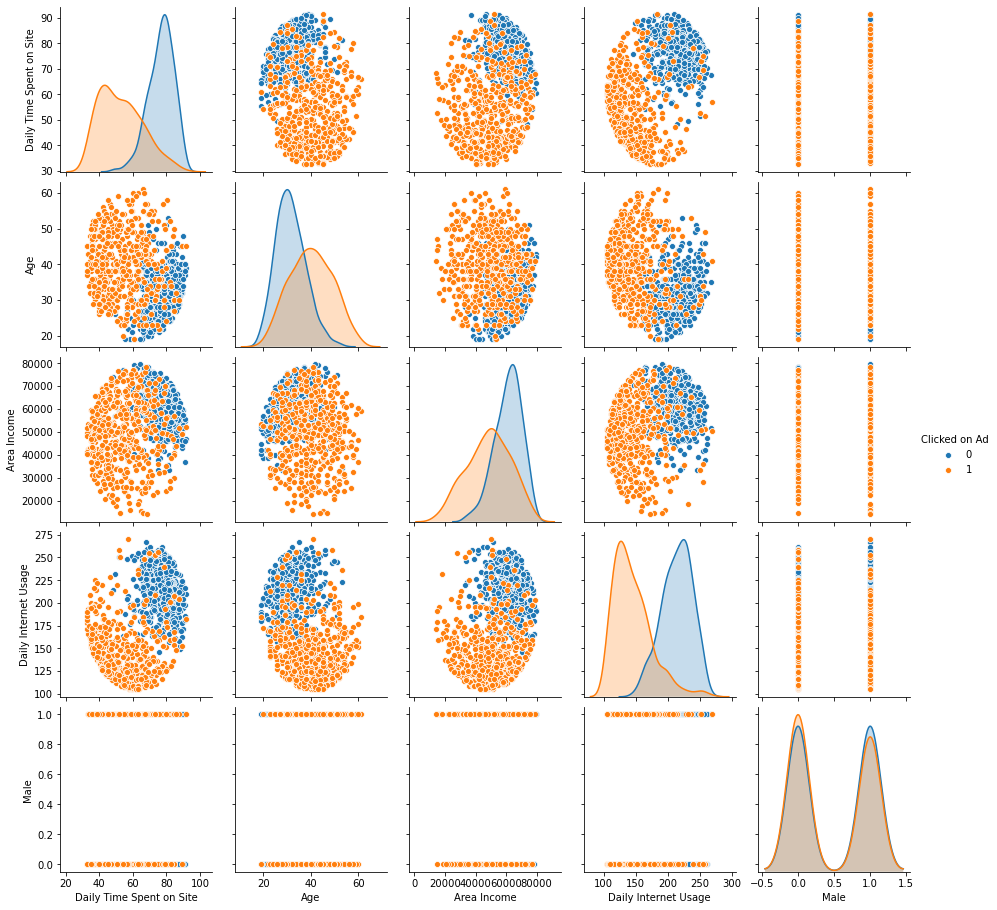

In [49]:
sns.pairplot(data=ad_data,hue='Clicked on Ad')

- We create another pairplot and use the column __'Clicked on Ad'__ as the hue parameter since that is our target variable and we can obtain a better understanding of the separatioin between the two categories.
- As we can see, there seems to be relatively good separation between our classes which will make our predictions more accurate.

<a id='section7'></a>
## 7. Training and Testing Data:

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets. Our target variable will be the __Clicked on Ad__ column and the other numerical columns will serve as our independent variables.

In [50]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [51]:
X = ad_data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male']]
y = ad_data['Clicked on Ad']

We have now created two separate dataframes. __X__ contains all the columns we will be using to predict our target variable. __Y__ is a dataframe that consists of the values of our target variable, namely, 'Clicked on Ad'.

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In the above code snippet, we split our dataset into training and testing sets. We have used a __70-30__ split of train and test data. This means that 70% of our records will be used to train our linear regression model and the remaining 30% will be used to test our model.

<a id='section701'></a>
### 7.1 Training the Model

Now its time to train our model on our training data!

In [53]:
logreg = LogisticRegression()              # Creating an instance of our Logistic Regression Model

**Training/Fitting our model on the training data**

In [54]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<a id='section702'></a>
### 7.2 Predicting off Test Data

Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [55]:
pred = logreg.predict(X_test)

<a id='section703'></a>
### 7.3 Evaluating model performance

**To see how good a job our model has done of prediction, we will use some metrics to evaluate the performance of our model.**

In [48]:
confusion_matrix(pred,y_test)

array([[140,  25],
       [  6, 129]], dtype=int64)

In [46]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       165
           1       0.84      0.96      0.89       135

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



- We have created a confusion matrix above and we can see that our model has been able to avoid a large number of __type 1__ and __type 2__ errors. Our predictions have been correct for the most part.
- We also looked at certain metrics to further evaluate our model. It seems to have done a relatively good job in terms of prediction. 

<a id='section8'></a>
## 8. Conclusion:

- In this notebook, we used various numerical and visualization libraries to perform an Exploratory Data Analysis of Advertising data.
- We were able to sucessfully process the datasets by getting rid of irrelevant data if necessary.
- We made use of packages like __pandas and seaborn__ to develop better insights about the data using visualization. <br/>
- We analyzed how different features impacted the probability that the user clicked the ad. 
- We also looked into how some important features are correlated with each other.
- Lastly we trained our model on our testing data using a logistic regression model and evaulated the model using various metrics.
- These steps helped us gain a better understanding of our data as well as create a model that would allow us to predict with reasonable accuracy whether the user would click on the ad or not.<br/><br/>